In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Preparing the Dataset

In [7]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['Price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Exploratory Data Analysis

In [10]:
#Finding Correlation
df.corr()
#Negative Correlation b/w two features shows that if one feature increases then the other decreases

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'PRICE')

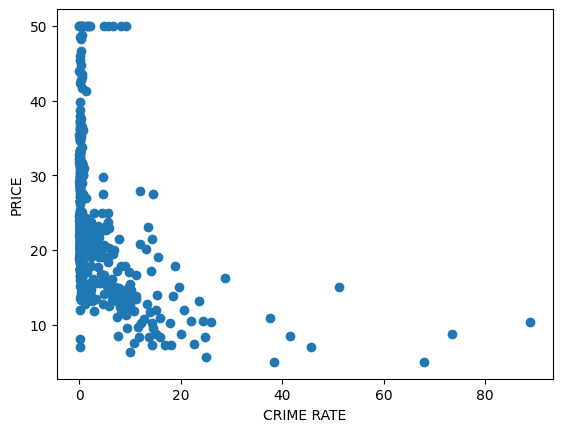

In [11]:
plt.scatter(df['CRIM'],df['Price'])
plt.xlabel("CRIME RATE")
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

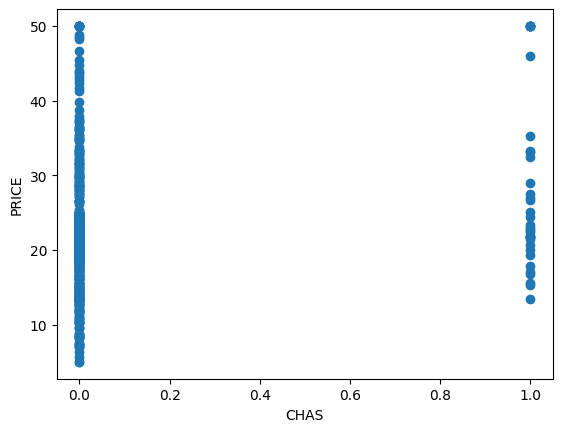

In [12]:
plt.scatter(df['CHAS'],df['Price'])
plt.xlabel("CHAS")
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

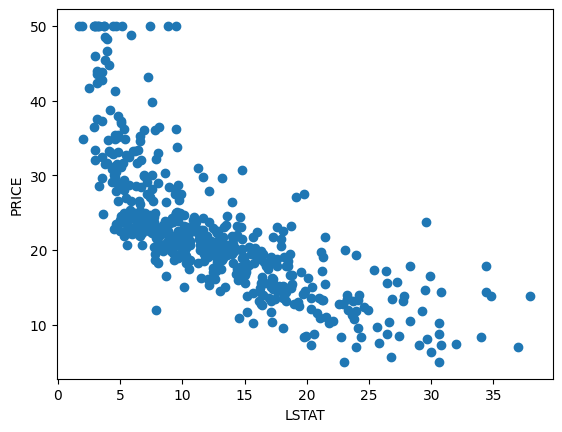

In [13]:
plt.scatter(df['LSTAT'],df['Price'])
plt.xlabel("LSTAT")
plt.ylabel("PRICE")

In [14]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
#Noramlizing/Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test) 
# we use transform in test data as using fit_transform changes the training parameters and become bias towards test data

In [18]:
print(X_test)

[[-0.406801   -0.50512499 -1.02225586 ... -0.74457062  0.41241246
  -0.47605794]
 [-0.41105674  1.26662874 -0.68165068 ... -0.30083661  0.42854113
  -1.25185755]
 [-0.4051199  -0.50512499  2.39678516 ...  0.8084984   0.35031705
   0.79535229]
 ...
 [-0.35439903 -0.50512499 -0.71195877 ... -0.38958342  0.25688594
  -1.09697922]
 [ 0.25423453 -0.50512499  1.00549958 ...  0.8528718  -2.98970133
   0.53487511]
 [ 0.77732457 -0.50512499  1.00549958 ...  0.8528718   0.33199949
   0.56585078]]


In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
#printing the coefficients and intercept
print(reg.coef_)
print(reg.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903956


In [21]:
#prediction
y_pred=reg.predict(X_test)

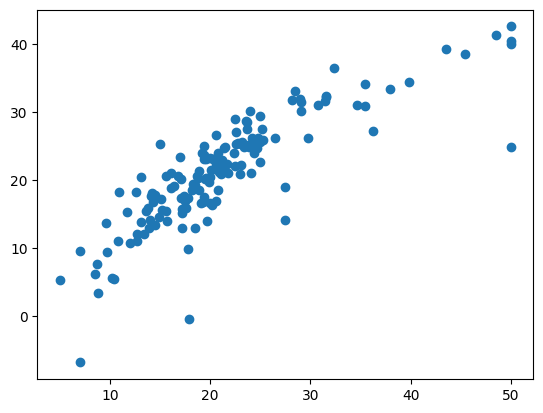

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
#Residuals(Errors)
residuals=y_test-y_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

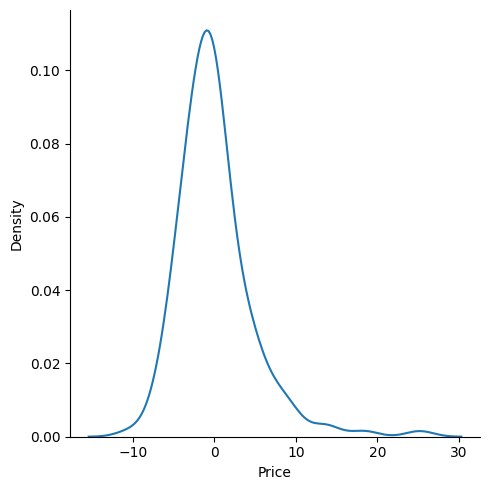

In [24]:
sns.displot(residuals,kind='kde') # if our model is predicting good,we should get a normal distribution

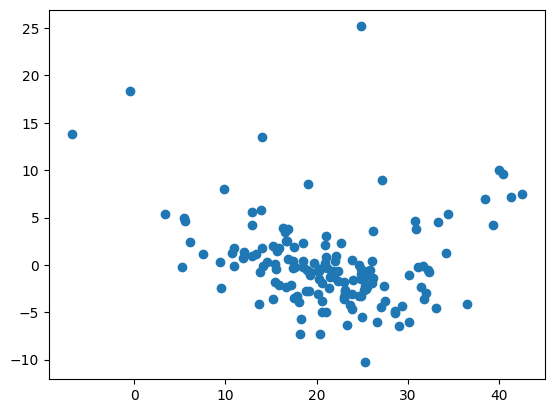

In [25]:
plt.scatter(y_pred,residuals) #we should get a uniform density

USING METRICS

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.162709871457406
21.51744423117722
4.638689926172821


In [27]:
#R square and Adjusted R square
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
print(r2score) # closer to 1 is better

#Adjusted R square = 1-[(1-R^2)*(n-1)/(n-k-1)]
n=len(y_test) # no. of obseravations
k=X_test.shape[1] # no. of predictor variable(features)
ar2score=1-((1-r2score)*(n-1)/(n-k-1)) # should be less than r2 score
print(ar2score)

0.7112260057484932
0.6840226584639308


PICKLING THE MODEL

In [33]:
import pickle
pickle.dump(reg,open('reg.pkl','wb'))
pickle.dump(sc,open('scalar.pkl','wb'))

In [29]:
pickled_model=pickle.load(open('reg.pkl','rb')) #this loads the pickled model

In [30]:
point=sc.transform(boston.data[0].reshape(1,-1))

/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
print(boston.feature_names)
boston.data[0]
d={}
for i,f in enumerate(boston.feature_names):
    d[f]=boston.data[0][i]
d

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


{'CRIM': 0.00632,
 'ZN': 18.0,
 'INDUS': 2.31,
 'CHAS': 0.0,
 'NOX': 0.538,
 'RM': 6.575,
 'AGE': 65.2,
 'DIS': 4.09,
 'RAD': 1.0,
 'TAX': 296.0,
 'PTRATIO': 15.3,
 'B': 396.9,
 'LSTAT': 4.98}

In [ ]:
{
	"data": {
		"CRIM": 0.00632,
		"ZN": 18.0,
		"INDUS": 2.31,
		"CHAS": 0.0,
		"NOX": 0.538,
		"RM": 6.575,
		"AGE": 65.2,
		"DIS": 4.09,
		"RAD": 1.0,
		"TAX": 296.0,
		"PTRATIO": 15.3,
		"B": 396.9,
		"LSTAT": 4.98
	}
}

In [31]:
pickled_model.predict(point)

array([30.08649576])